In [1]:
#Import the data set
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv("model.csv",index_col=0)
df


,id,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
0,139Q880b,Female,Premium,60.0,37.66,New,Entertainment,4,4,2,4,3,5,3,4,2,0,0,Not Satisfied
1,513F768p,Female,Premium,57.0,331.90,New,Technology,1,1,3,5,5,5,4,5,5,0,0,Satisfied
2,933T167j,Female,Premium,38.0,311.06,New,Technology,3,3,5,5,5,4,1,5,5,0,0,Satisfied
3,193N829g,Male,Premium,NaN,85.14,New,Technology,5,5,3,2,5,4,5,1,3,0,0,Not Satisfied
4,661I898j,Male,Premium,37.0,23.15,New,Entertainment,1,1,5,1,3,3,2,2,5,0,0,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,679X543x,Female,Premium,29.0,156.42,New,Home/Kitchen,1,1,3,3,4,3,1,3,3,0,0,Not Satisfied
49996,110V745c,Female,Premium,28.0,20.03,New,Technology,3,3,5,1,4,4,2,4,5,0,0,Not Satisfied
49997,350E543w,Male,Premium,28.0,70.41,New,Home/Kitchen,5,1,4,1,1,5,4,4,4,0,0,Not Satisfied
49998,685B2d60,Male,Premium,35.0,98.82,New,Entertainment,4,4,1,2,2,2,3,2,3,0,0,Not Satisfied


## Data analysis and Data preparation

In [5]:
#Change the type of "Satisfaction" variable, from categorical to numerical

target=df.index[df['Satisfaction']=='Not Satisfied'].tolist() #trovo gli indici dei non soddisfatti e metto tutto in una lista
df['Satisfaction']=1
df['Satisfaction'][target]=0


<ipython-input-5-2127b38e5ff7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Satisfaction'][target]=0


In [6]:
df

,id,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
0,139Q880b,Female,Premium,60.0,37.66,New,Entertainment,4,4,2,4,3,5,3,4,2,0,0,0
1,513F768p,Female,Premium,57.0,331.90,New,Technology,1,1,3,5,5,5,4,5,5,0,0,1
2,933T167j,Female,Premium,38.0,311.06,New,Technology,3,3,5,5,5,4,1,5,5,0,0,1
3,193N829g,Male,Premium,NaN,85.14,New,Technology,5,5,3,2,5,4,5,1,3,0,0,0
4,661I898j,Male,Premium,37.0,23.15,New,Entertainment,1,1,5,1,3,3,2,2,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,679X543x,Female,Premium,29.0,156.42,New,Home/Kitchen,1,1,3,3,4,3,1,3,3,0,0,0
49996,110V745c,Female,Premium,28.0,20.03,New,Technology,3,3,5,1,4,4,2,4,5,0,0,0
49997,350E543w,Male,Premium,28.0,70.41,New,Home/Kitchen,5,1,4,1,1,5,4,4,4,0,0,0
49998,685B2d60,Male,Premium,35.0,98.82,New,Entertainment,4,4,1,2,2,2,3,2,3,0,0,0


In [4]:
df.dtypes

id                                     object
Gender                                 object
Customer Type                          object
Age                                   float64
Price                                 float64
NewUsed                                object
Category                               object
Product description accuracy            int64
Manufacturer sustainability             int64
Packaging quality                       int64
Additional options                      int64
Helpfulness of reviews and ratings      int64
Integrity of packaging                  int64
Ease check-out procedure                int64
Relevance of related products           int64
Costumer insurance                      int64
Shipping delay in days                  int64
Arrival delay in days                   int64
Satisfaction                            int64
dtype: object

In [13]:
print(df.shape)
df.columns[df.isna().any()].tolist()

#As is possible to see from the descritpion of the dataset NaN values are present just in the column "Age"

(50000, 19)


['Age']

In [12]:
df.describe()

,Age,Price,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
count,46132.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,41.601817,118.785945,3.061120,2.977920,3.190460,3.36630,3.335460,3.621360,3.300540,3.632180,3.271140,0.110160,0.112240,0.410040
std,13.534615,99.695572,1.527177,1.277241,1.333109,1.28934,1.316481,1.181296,1.266605,1.175362,1.315727,0.412393,0.415121,0.491846
min,18.000000,1.020000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,42.560000,2.000000,2.000000,2.000000,2.00000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,41.000000,84.395000,3.000000,3.000000,3.000000,4.00000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,52.000000,172.600000,4.000000,4.000000,4.000000,4.00000,4.000000,5.000000,4.000000,5.000000,4.000000,0.000000,0.000000,1.000000
max,85.000000,540.630000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,16.000000,16.000000,1.000000


(array([5776., 6969., 6834., 7254., 7409., 6290., 3267., 2006.,  264.,
          63.]),
 array([18. , 24.7, 31.4, 38.1, 44.8, 51.5, 58.2, 64.9, 71.6, 78.3, 85. ]),
 <BarContainer object of 10 artists>)

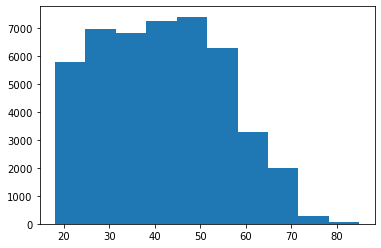

In [15]:
#A histogram is used to visualize how the Age is distributed in the data set. 
#Old people are a sort of outliers but it is important to analyze if they are significant to discriminate satisfacted and non satisfacted customers.
plt.hist(df['Age'])


In [16]:
#Analyze the percentage of satisfied people among the genders
df_premium=df[df['Gender']=='Male']
print(df_premium['Satisfaction'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')

0    59.8%
1    40.2%
Name: Satisfaction, dtype: object


In [18]:
#Analyze the percentage of satisfied people among the genders
df_premium=df[df['Gender']=='Female']
print(df_premium['Satisfaction'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')

0    58.2%
1    41.8%
Name: Satisfaction, dtype: object


Number of obs whose age is higher than 70: 376
0    71.8%
1    28.2%
Name: Satisfaction, dtype: object
Total number of obs in the data frame: 50000
0    59.0%
1    41.0%
Name: Satisfaction, dtype: object


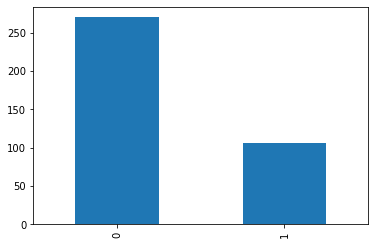

In [19]:
#It is shown the number of customers whose age is higher than 70 and the percentage of non satisfacted customers among them is 
#compared with the percentage of satisfied customers considering all the observation
#Old people show an higher rate of non satisfaction.

df_70=df[df['Age']>70]
print("Number of obs whose age is higher than 70:",df_70.shape[0])
print(df_70['Satisfaction'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')
df_70['Satisfaction'].value_counts().plot(kind='bar') 
print("Total number of obs in the data frame:",df.shape[0])
print(df['Satisfaction'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')

In [20]:
#Check if a customer bought twice

df_id=df.iloc[:,0]
duplicateRowsDF = df_id[df_id.duplicated()]
duplicateRowsDF  #037U619y is the id of a customer that bought twice

42943    037U619y
Name: id, dtype: object

In [22]:
#Check of the id in the dataset

df[df['id']=='037U619y'] #There is an error associated to the id '037U619y', in fact the 2 customers are different (Female and Male)


,id,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
28812,037U619y,Female,Not Premium,37.0,36.67,New,Sport,0,4,4,2,2,5,2,2,4,0,0,0
42943,037U619y,Male,Not Premium,25.0,62.12,Used,Home/Kitchen,1,4,5,4,2,3,3,3,5,0,0,0


In [23]:
#A new dataframe without the customers associated to the id found before is created

df_drop=df.drop([42943,28812])
print(len(df), len(df_drop))


50000 49998


In [24]:
df_drop

,id,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
0,139Q880b,Female,Premium,60.0,37.66,New,Entertainment,4,4,2,4,3,5,3,4,2,0,0,0
1,513F768p,Female,Premium,57.0,331.90,New,Technology,1,1,3,5,5,5,4,5,5,0,0,1
2,933T167j,Female,Premium,38.0,311.06,New,Technology,3,3,5,5,5,4,1,5,5,0,0,1
3,193N829g,Male,Premium,NaN,85.14,New,Technology,5,5,3,2,5,4,5,1,3,0,0,0
4,661I898j,Male,Premium,37.0,23.15,New,Entertainment,1,1,5,1,3,3,2,2,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,679X543x,Female,Premium,29.0,156.42,New,Home/Kitchen,1,1,3,3,4,3,1,3,3,0,0,0
49996,110V745c,Female,Premium,28.0,20.03,New,Technology,3,3,5,1,4,4,2,4,5,0,0,0
49997,350E543w,Male,Premium,28.0,70.41,New,Home/Kitchen,5,1,4,1,1,5,4,4,4,0,0,0
49998,685B2d60,Male,Premium,35.0,98.82,New,Entertainment,4,4,1,2,2,2,3,2,3,0,0,0


In [25]:
#Reset the index
df_drop = df_drop.reset_index()
df_drop=df_drop.drop(columns='index')

In [26]:
df_drop

,id,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
0,139Q880b,Female,Premium,60.0,37.66,New,Entertainment,4,4,2,4,3,5,3,4,2,0,0,0
1,513F768p,Female,Premium,57.0,331.90,New,Technology,1,1,3,5,5,5,4,5,5,0,0,1
2,933T167j,Female,Premium,38.0,311.06,New,Technology,3,3,5,5,5,4,1,5,5,0,0,1
3,193N829g,Male,Premium,NaN,85.14,New,Technology,5,5,3,2,5,4,5,1,3,0,0,0
4,661I898j,Male,Premium,37.0,23.15,New,Entertainment,1,1,5,1,3,3,2,2,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,679X543x,Female,Premium,29.0,156.42,New,Home/Kitchen,1,1,3,3,4,3,1,3,3,0,0,0
49994,110V745c,Female,Premium,28.0,20.03,New,Technology,3,3,5,1,4,4,2,4,5,0,0,0
49995,350E543w,Male,Premium,28.0,70.41,New,Home/Kitchen,5,1,4,1,1,5,4,4,4,0,0,0
49996,685B2d60,Male,Premium,35.0,98.82,New,Entertainment,4,4,1,2,2,2,3,2,3,0,0,0


In [27]:
#CHECK FOR NaN
df_drop.isna().any() #There is a NaN just in the column "Age"

id                                    False
Gender                                False
Customer Type                         False
Age                                    True
Price                                 False
NewUsed                               False
Category                              False
Product description accuracy          False
Manufacturer sustainability           False
Packaging quality                     False
Additional options                    False
Helpfulness of reviews and ratings    False
Integrity of packaging                False
Ease check-out procedure              False
Relevance of related products         False
Costumer insurance                    False
Shipping delay in days                False
Arrival delay in days                 False
Satisfaction                          False
dtype: bool

In [28]:
#Creation of a data frame with just NaN values on the 'Age' column
is_NaN = df_drop.isnull()
row_has_NaN = is_NaN.any(axis=1)
df_NaN = df_drop[row_has_NaN] 
df_NaN
df_NaN.shape

#3868 missing values


(3868, 19)

In [29]:
df_NaN

,id,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
3,193N829g,Male,Premium,NaN,85.14,New,Technology,5,5,3,2,5,4,5,1,3,0,0,0
13,045Z435w,Male,Premium,NaN,386.30,New,Other,4,4,3,4,4,4,3,4,3,0,0,0
16,357O477q,Female,Premium,NaN,218.93,Used,Home/Kitchen,1,3,3,3,2,3,5,3,5,0,0,0
25,079E265e,Male,Premium,NaN,40.14,New,Technology,3,3,4,3,2,4,3,4,4,0,0,0
33,576R242y,Male,Premium,NaN,20.18,New,Entertainment,0,5,3,5,3,4,5,5,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49941,773V236a,Female,Premium,NaN,89.49,New,Entertainment,1,1,3,4,3,3,2,1,3,0,0,1
49946,431Y661r,Male,Premium,NaN,47.85,New,Entertainment,1,2,3,4,5,3,4,2,3,0,0,0
49955,591F781e,Female,Premium,NaN,39.21,New,Sport,5,3,3,4,3,5,5,5,3,0,0,0
49968,545Z925x,Male,Premium,NaN,221.91,New,Entertainment,4,4,2,5,3,3,2,4,2,0,0,0


In [30]:
#Percentages of satisfied and not satisfied customers considering all the data frame

df_drop.iloc[:,-1].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

0    59.0%
1    41.0%
Name: Satisfaction, dtype: object

0    85.1%
1    14.9%
Name: Satisfaction, dtype: object


<AxesSubplot:>

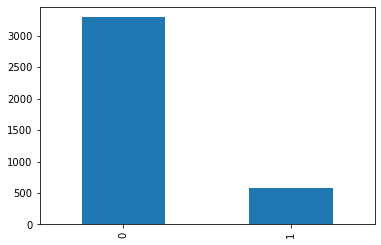

In [31]:
#Among the NaN observation there is a strong imbalance for what concerns the satisfaction level, NaN values contain an important information


print(df_NaN['Satisfaction'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')
df_NaN['Satisfaction'].value_counts().plot(kind='bar') 



In [32]:
#NaN values are substitute with a conventional value that is very different from all the values present in the column 'Age'
#A high value is used because the high percentage of non satisfied customers among the Nan observation is aligned with the percentage
#of non satisfied customers among old people
#Then the column 'id' is dropped from the dataset because it is not relevant for the scope of the analysis

df_drop['Age'][row_has_NaN]=120
df_drop1=df_drop.drop('id',axis=1)
df_drop1

<ipython-input-32-43faff82e9dc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['Age'][row_has_NaN]=120


,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
0,Female,Premium,60.0,37.66,New,Entertainment,4,4,2,4,3,5,3,4,2,0,0,0
1,Female,Premium,57.0,331.90,New,Technology,1,1,3,5,5,5,4,5,5,0,0,1
2,Female,Premium,38.0,311.06,New,Technology,3,3,5,5,5,4,1,5,5,0,0,1
3,Male,Premium,120.0,85.14,New,Technology,5,5,3,2,5,4,5,1,3,0,0,0
4,Male,Premium,37.0,23.15,New,Entertainment,1,1,5,1,3,3,2,2,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Female,Premium,29.0,156.42,New,Home/Kitchen,1,1,3,3,4,3,1,3,3,0,0,0
49994,Female,Premium,28.0,20.03,New,Technology,3,3,5,1,4,4,2,4,5,0,0,0
49995,Male,Premium,28.0,70.41,New,Home/Kitchen,5,1,4,1,1,5,4,4,4,0,0,0
49996,Male,Premium,35.0,98.82,New,Entertainment,4,4,1,2,2,2,3,2,3,0,0,0


In [19]:
#Creation of a dataset containing just the categorical variables

df_cat=df_drop1.select_dtypes(include=['object'])
df_cat

,Gender,Customer Type,NewUsed,Category
0,Female,Premium,New,Entertainment
1,Female,Premium,New,Technology
2,Female,Premium,New,Technology
3,Male,Premium,New,Technology
4,Male,Premium,New,Entertainment
...,...,...,...,...
49993,Female,Premium,New,Home/Kitchen
49994,Female,Premium,New,Technology
49995,Male,Premium,New,Home/Kitchen
49996,Male,Premium,New,Entertainment


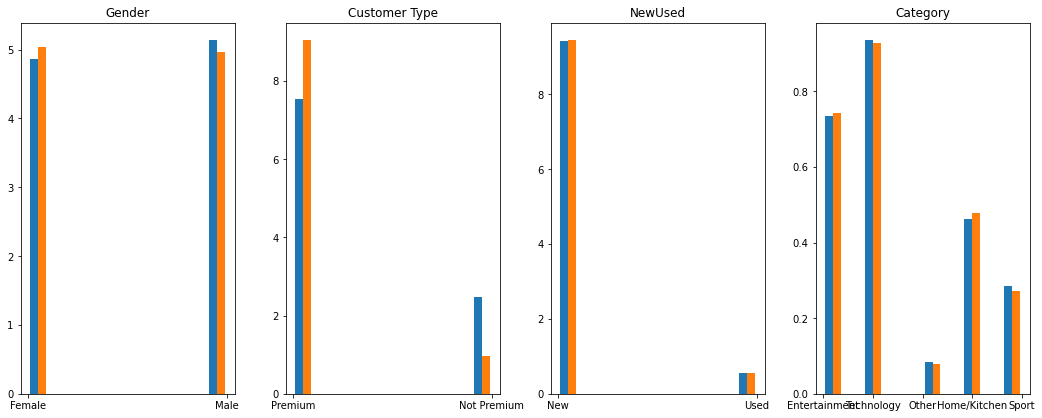

In [20]:
#Visualization of histograms to understand which categorical variables behave differently among the satisfacted and
#non satisfacted customers

df_cat0=df_cat[df_drop1['Satisfaction']==0] 
df_cat1=df_cat[df_drop1['Satisfaction']==1] 


fig, axes = plt.subplots(1, 4,figsize=[15,6])
axes = axes.flatten()
fig.tight_layout(pad=2)

i=0
for x in df_cat.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_cat0[x],df_cat1[x]],density=True)
    plt.title(x)
    i+=1
plt.show()

#'NewUsed' and 'Category' variables don't seem to be relevant for a discriminat analysis

In [21]:
#Creation of a dataframe with just the dummy variables relevant for a discriminant analysis, 'NewUsed' and 'Category' variables
#are not considered

dummies=pd.get_dummies(df_cat[['Gender','Customer Type']],drop_first=True)
dummies

,Gender_Male,Customer Type_Premium
0,0,1
1,0,1
2,0,1
3,1,1
4,1,1
...,...,...
49993,0,1
49994,0,1
49995,1,1
49996,1,1


In [22]:
#Creation of a dataset containing just the numerical variables

df_num=df_drop1.select_dtypes(include=[np.number])
df_num

,Age,Price,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
0,60.0,37.66,4,4,2,4,3,5,3,4,2,0,0,0
1,57.0,331.90,1,1,3,5,5,5,4,5,5,0,0,1
2,38.0,311.06,3,3,5,5,5,4,1,5,5,0,0,1
3,120.0,85.14,5,5,3,2,5,4,5,1,3,0,0,0
4,37.0,23.15,1,1,5,1,3,3,2,2,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,29.0,156.42,1,1,3,3,4,3,1,3,3,0,0,0
49994,28.0,20.03,3,3,5,1,4,4,2,4,5,0,0,0
49995,28.0,70.41,5,1,4,1,1,5,4,4,4,0,0,0
49996,35.0,98.82,4,4,1,2,2,2,3,2,3,0,0,0


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Product description accuracy'}>,
        <AxesSubplot:title={'center':'Manufacturer sustainability'}>],
       [<AxesSubplot:title={'center':'Packaging quality'}>,
        <AxesSubplot:title={'center':'Additional options'}>,
        <AxesSubplot:title={'center':'Helpfulness of reviews and ratings'}>,
        <AxesSubplot:title={'center':'Integrity of packaging'}>],
       [<AxesSubplot:title={'center':'Ease check-out procedure'}>,
        <AxesSubplot:title={'center':'Relevance of related products'}>,
        <AxesSubplot:title={'center':'Costumer insurance'}>,
        <AxesSubplot:title={'center':'Shipping delay in days'}>],
       [<AxesSubplot:title={'center':'Arrival delay in days'}>,
        <AxesSubplot:title={'center':'Satisfaction'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

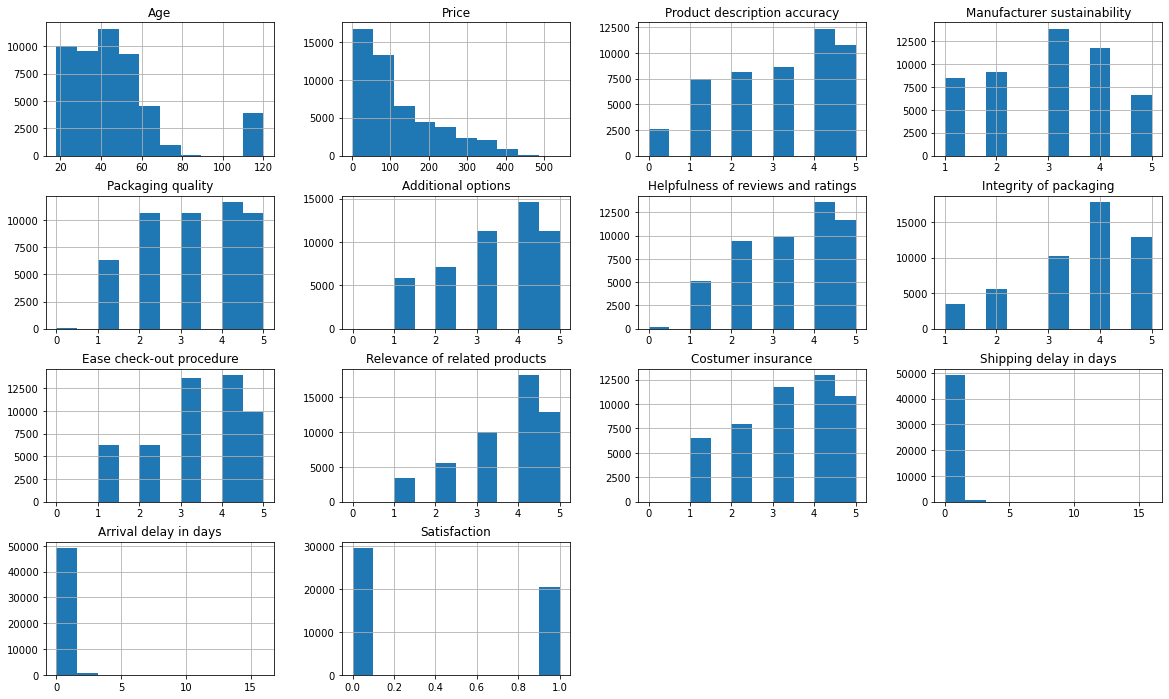

In [23]:
df_num.hist(layout=(4,4),figsize=(20,12))

Index(['Age', 'Price', 'Product description accuracy',
       'Manufacturer sustainability', 'Packaging quality',
       'Additional options', 'Helpfulness of reviews and ratings',
       'Integrity of packaging', 'Ease check-out procedure',
       'Relevance of related products', 'Costumer insurance',
       'Shipping delay in days', 'Arrival delay in days', 'Satisfaction'],
      dtype='object')


<AxesSubplot:>

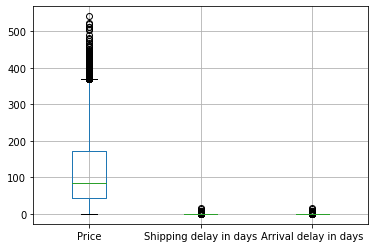

In [24]:
#Boxplot of the numerical variables that are interesting for their left skewed distribution: 'Price','Shipping delay in days','Arrival delay in days'

print(df_num.columns)
df_num.boxplot(column=['Price','Shipping delay in days','Arrival delay in days'])
#There is a huge variability just in the 'Price' variable as it could have been expected

<AxesSubplot:xlabel='Shipping delay in days'>

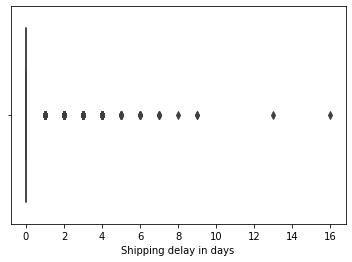

In [25]:
#Boxplot considering just the column 'Shipping delay in days'

sns.boxplot(x=df_drop1['Shipping delay in days'])

array([[<AxesSubplot:title={'center':'Shipping delay in days'}>]],
      dtype=object)

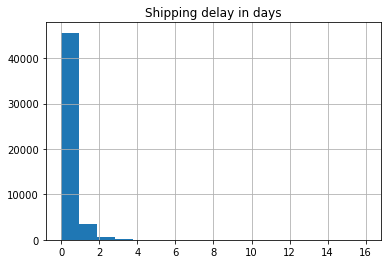

In [26]:
df_drop1.hist(column='Shipping delay in days', bins='auto') 
#The vast majority of the observation has a shipping delay in days equal to 0

In [27]:
#Computation of the percentages and of the values of the different delays in the shipping

print(df_drop1['Shipping delay in days'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')
print(df_drop1.groupby('Shipping delay in days').count())


0     91.2%
1      7.1%
2      1.2%
3      0.3%
4      0.1%
5      0.0%
6      0.0%
7      0.0%
9      0.0%
8      0.0%
13     0.0%
16     0.0%
Name: Shipping delay in days, dtype: object
                        Gender  Customer Type    Age  Price  NewUsed  \
Shipping delay in days                                                 
0                        45623          45623  45623  45623    45623   
1                         3571           3571   3571   3571     3571   
2                          600            600    600    600      600   
3                          147            147    147    147      147   
4                           33             33     33     33       33   
5                            9              9      9      9        9   
6                            6              6      6      6        6   
7                            4              4      4      4        4   
8                            1              1      1      1        1   
9                   

In [28]:
vector_shipping=df_drop1['Shipping delay in days'].unique()
vector_shipping

array([ 0,  1,  2,  3,  4,  7,  5,  6,  9, 13,  8, 16], dtype=int64)

In [29]:
#For each delay in the shipping expressed in days the number of observation and the percentage
#of satisfacted customers is shown

for i in vector_shipping:
    df_ship=df_drop1.loc[df_drop1['Shipping delay in days']==i]
    print('Shipping delay in days=',i)
    print("The number of obs is:",df_ship['Satisfaction'].count())
    print(df_ship['Satisfaction'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')
    
#Very few observation present a delay in the shipping higher than 4 days

Shipping delay in days= 0
The number of obs is: 45623
0    58.3%
1    41.7%
Name: Satisfaction, dtype: object
Shipping delay in days= 1
The number of obs is: 3571
0    66.3%
1    33.7%
Name: Satisfaction, dtype: object
Shipping delay in days= 2
The number of obs is: 600
0    66.5%
1    33.5%
Name: Satisfaction, dtype: object
Shipping delay in days= 3
The number of obs is: 147
0    67.3%
1    32.7%
Name: Satisfaction, dtype: object
Shipping delay in days= 4
The number of obs is: 33
0    63.6%
1    36.4%
Name: Satisfaction, dtype: object
Shipping delay in days= 7
The number of obs is: 4
0    100.0%
Name: Satisfaction, dtype: object
Shipping delay in days= 5
The number of obs is: 9
0    66.7%
1    33.3%
Name: Satisfaction, dtype: object
Shipping delay in days= 6
The number of obs is: 6
1    66.7%
0    33.3%
Name: Satisfaction, dtype: object
Shipping delay in days= 9
The number of obs is: 2
0    100.0%
Name: Satisfaction, dtype: object
Shipping delay in days= 13
The number of obs is: 1
1  

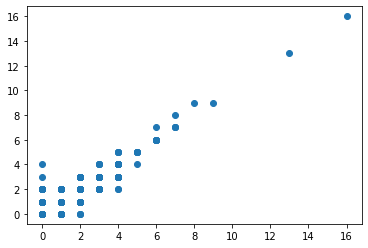

In [30]:
#Shipping and arrival days are carrying the same info? Is it possible to take just one variable out of the two?

plt.scatter(df_drop1['Arrival delay in days'],df_drop1['Shipping delay in days'])

In [31]:
#Computation of the linear correlation coefficient between "Shipping delay in days" and "Arrival delay in days"

r = np.corrcoef(df_drop1['Arrival delay in days'],df_drop1['Shipping delay in days'])
print(r[0,1])

#It was chosen to drop the 'Shipping delay in days' column because it is less important for the final customer's satisfaction

df_num1 = df_num.drop(columns="Shipping delay in days") 
df_num1

0.9121783947512945


,Age,Price,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Arrival delay in days,Satisfaction
0,60.0,37.66,4,4,2,4,3,5,3,4,2,0,0
1,57.0,331.90,1,1,3,5,5,5,4,5,5,0,1
2,38.0,311.06,3,3,5,5,5,4,1,5,5,0,1
3,120.0,85.14,5,5,3,2,5,4,5,1,3,0,0
4,37.0,23.15,1,1,5,1,3,3,2,2,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,29.0,156.42,1,1,3,3,4,3,1,3,3,0,0
49994,28.0,20.03,3,3,5,1,4,4,2,4,5,0,0
49995,28.0,70.41,5,1,4,1,1,5,4,4,4,0,0
49996,35.0,98.82,4,4,1,2,2,2,3,2,3,0,0


In [32]:
print(df_drop1['Arrival delay in days'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')
print(df_drop1.groupby('Arrival delay in days').count())

0     91.1%
1      7.2%
2      1.2%
3      0.3%
4      0.1%
6      0.0%
5      0.0%
7      0.0%
8      0.0%
9      0.0%
13     0.0%
16     0.0%
Name: Arrival delay in days, dtype: object
                       Gender  Customer Type    Age  Price  NewUsed  Category  \
Arrival delay in days                                                           
0                       45547          45547  45547  45547    45547     45547   
1                        3623           3623   3623   3623     3623      3623   
2                         619            619    619    619      619       619   
3                         147            147    147    147      147       147   
4                          41             41     41     41       41        41   
5                           6              6      6      6        6         6   
6                           7              7      7      7        7         7   
7                           4              4      4      4        4         4   
8  

In [33]:
vector_arrival=df_drop1['Arrival delay in days'].unique()
vector_arrival

array([ 0,  1,  2,  3,  4,  7,  5,  6,  9, 13,  8, 16], dtype=int64)

In [34]:
for i in vector_arrival:
    df_arrival=df_drop1.loc[df_drop['Arrival delay in days']==i]
    print('Arrival delay in days=',i)
    print("The number of obs is:",df_arrival['Satisfaction'].count())
    print(df_arrival['Satisfaction'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')

#When the arrival delay in days increase the percentage of satisfied customer slightly decreases.
#There are very few observation for which the arrival delay in says is higher than 5 days.
#There is a strange situation for what concerns the satisfaction level considering some days of delay in the arrival (5,6 and 13 days).
#In fact, contrary to the expectations, even tough the delay in these days is pretty high the percentage of satisfacted customers increases
#and it was supposed that this situation depended on the personal characterstics of the customers.



Arrival delay in days= 0
The number of obs is: 45547
0    58.3%
1    41.7%
Name: Satisfaction, dtype: object
Arrival delay in days= 1
The number of obs is: 3623
0    66.6%
1    33.4%
Name: Satisfaction, dtype: object
Arrival delay in days= 2
The number of obs is: 619
0    66.1%
1    33.9%
Name: Satisfaction, dtype: object
Arrival delay in days= 3
The number of obs is: 147
0    66.0%
1    34.0%
Name: Satisfaction, dtype: object
Arrival delay in days= 4
The number of obs is: 41
0    65.9%
1    34.1%
Name: Satisfaction, dtype: object
Arrival delay in days= 7
The number of obs is: 4
0    75.0%
1    25.0%
Name: Satisfaction, dtype: object
Arrival delay in days= 5
The number of obs is: 6
0    50.0%
1    50.0%
Name: Satisfaction, dtype: object
Arrival delay in days= 6
The number of obs is: 7
1    57.1%
0    42.9%
Name: Satisfaction, dtype: object
Arrival delay in days= 9
The number of obs is: 1
0    100.0%
Name: Satisfaction, dtype: object
Arrival delay in days= 13
The number of obs is: 1
1  

In [35]:
#Get the indexes of the obs with an Arrival delay in days higher than 5 because they can be considered as outliers and moreover
#some observation may introduce some biases in the construction of the future algorithms because of the strange increase in the satisfaction level.

index_rows=df_num1.index[df_num1['Arrival delay in days']>= 5].tolist()
#and I remove those rows
index_rows


[1364,
 2330,
 9387,
 11892,
 13076,
 17881,
 19730,
 23148,
 23239,
 24060,
 28048,
 30734,
 32139,
 32547,
 35537,
 35966,
 40066,
 46633,
 47773,
 48111,
 49266]

In [36]:
#Creation of a new data frame (dummies2), in which just the dummy variables are considered, that does not contain 
#the observation associated to 'Arrival delay in days' higher than 5

dummies1=dummies
dummies2=dummies1.drop(dummies1.index[index_rows])
dummies2
dummies2 = dummies2.reset_index()
dummies2


,index,Gender_Male,Customer Type_Premium
0,0,0,1
1,1,0,1
2,2,0,1
3,3,1,1
4,4,1,1
...,...,...,...
49972,49993,0,1
49973,49994,0,1
49974,49995,1,1
49975,49996,1,1


In [37]:
#Creation of a new data frame (df_num2), in which just the numerical variables are considered, that does not contain 
#the observation associated to 'Arrival delay in days' higher than 5

df_num2 = df_num1.drop(df_num1[df_num1['Arrival delay in days'] >= 5].index) 
df_num2 = df_num2.reset_index()



In [38]:
df_num2=df_num2.drop(columns='index')
df_num2


,Age,Price,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Arrival delay in days,Satisfaction
0,60.0,37.66,4,4,2,4,3,5,3,4,2,0,0
1,57.0,331.90,1,1,3,5,5,5,4,5,5,0,1
2,38.0,311.06,3,3,5,5,5,4,1,5,5,0,1
3,120.0,85.14,5,5,3,2,5,4,5,1,3,0,0
4,37.0,23.15,1,1,5,1,3,3,2,2,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,29.0,156.42,1,1,3,3,4,3,1,3,3,0,0
49973,28.0,20.03,3,3,5,1,4,4,2,4,5,0,0
49974,28.0,70.41,5,1,4,1,1,5,4,4,4,0,0
49975,35.0,98.82,4,4,1,2,2,2,3,2,3,0,0


<AxesSubplot:xlabel='Price'>

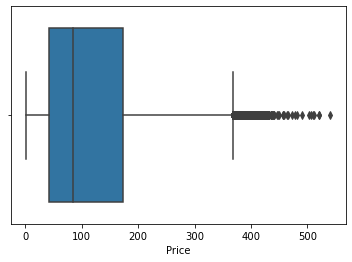

In [39]:
#Boxplot of the variable 'Price'. There are many points out of the whiskers but they cannot be
#all outliers becasue by defintion their frequency cannot be high

sns.boxplot(x=df_drop1['Price']) 

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

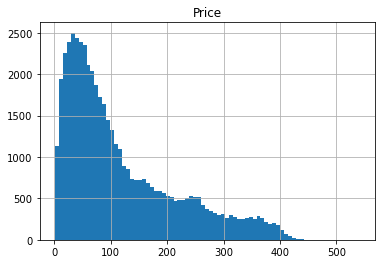

In [40]:
df_drop1.hist(column='Price', bins='auto')

0.23956947053234245


C:\Users\13-U005NL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\13-U005NL\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9884379506111145, pvalue=0.0)

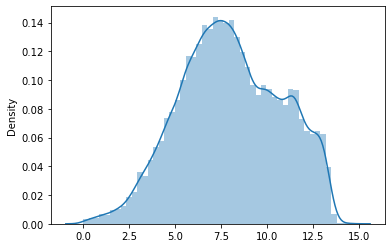

In [41]:
#Use of Box Cox transformation to get a normal distribution

from scipy.stats import shapiro

fitted_data = stats.boxcox(df_num2['Price']) 
fitted_data[0]
print(fitted_data[1]) #lambda of the Box Cox transformation
sns.distplot(fitted_data[0]) #prices transformed
shapiro(fitted_data[0]) 

# It was not possible to obtain a normal distribution but the left skewed distribution of 'Price'was reduced

In [42]:
#Save the tuple obtained through the Box Cox transformation because the exponent will be used to transform
#the price of future observation

import pickle
pickle.dump(fitted_data, open('fitted_data.pkl', 'wb')) 

C:\Users\13-U005NL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

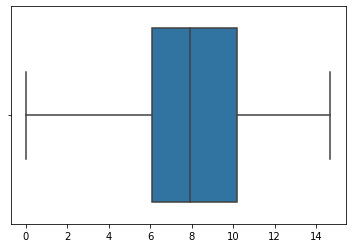

In [43]:
#After the trasformation of the price a boxplot was built, there are no points out of the whiskers
sns.boxplot(fitted_data[0]) 

In [44]:
#The transformed price values were added to the dataframe

df_num2['trasfPrice']=fitted_data[0]

In [45]:
df_num2

,Age,Price,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Arrival delay in days,Satisfaction,trasfPrice
0,60.0,37.66,4,4,2,4,3,5,3,4,2,0,0,5.782223
1,57.0,331.90,1,1,3,5,5,5,4,5,5,0,1,12.595530
2,38.0,311.06,3,3,5,5,5,4,1,5,5,0,1,12.337017
3,120.0,85.14,5,5,3,2,5,4,5,1,3,0,0,7.930980
4,37.0,23.15,1,1,5,1,3,3,2,2,5,0,1,4.686653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,29.0,156.42,1,1,3,3,4,3,1,3,3,0,0,9.829906
49973,28.0,20.03,3,3,5,1,4,4,2,4,5,0,0,4.384619
49974,28.0,70.41,5,1,4,1,1,5,4,4,4,0,0,7.392435
49975,35.0,98.82,4,4,1,2,2,2,3,2,3,0,0,8.370897


In [46]:
#The column 'Price' was deleted

df_num2 = df_num2.drop(columns="Price") 
df_num2

,Age,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Arrival delay in days,Satisfaction,trasfPrice
0,60.0,4,4,2,4,3,5,3,4,2,0,0,5.782223
1,57.0,1,1,3,5,5,5,4,5,5,0,1,12.595530
2,38.0,3,3,5,5,5,4,1,5,5,0,1,12.337017
3,120.0,5,5,3,2,5,4,5,1,3,0,0,7.930980
4,37.0,1,1,5,1,3,3,2,2,5,0,1,4.686653
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,29.0,1,1,3,3,4,3,1,3,3,0,0,9.829906
49973,28.0,3,3,5,1,4,4,2,4,5,0,0,4.384619
49974,28.0,5,1,4,1,1,5,4,4,4,0,0,7.392435
49975,35.0,4,4,1,2,2,2,3,2,3,0,0,8.370897


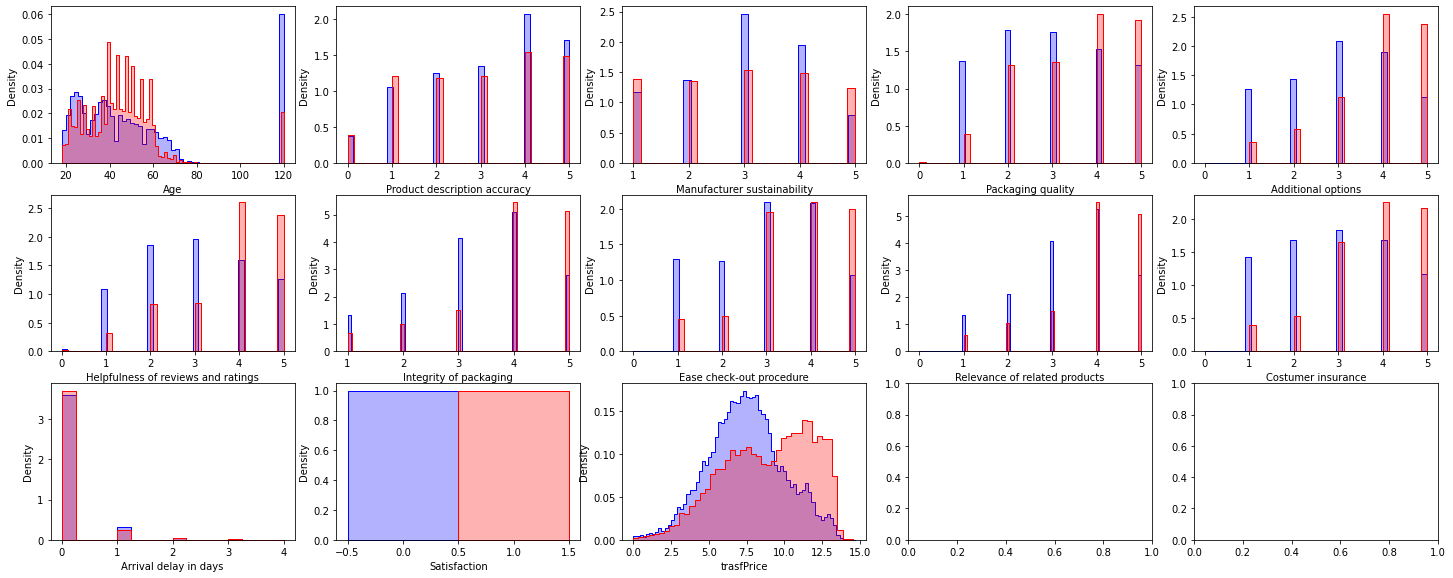

In [47]:
#The distribution of sarisfacted and non satisfated customers for each nuerical variable are shown below

%matplotlib inline

X0 = df_num2[df_num2['Satisfaction']==0]
X1 = df_num2[df_num2['Satisfaction']==1]

fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(20,8))
fig.tight_layout()

for i, ax in zip(range(df_num2.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", ax=ax, stat='density', element="step",  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", ax=ax,stat='density', element="step",  alpha=0.3)
plt.show()

#All the numerical variables seem to be important to discriminate satisfacted and non satisfated customers, maybe just the 'Arrival delay in days' variable 
#could be removed but it was decided to keep it anyway

In [48]:
df_num2.columns

Index(['Age', 'Product description accuracy', 'Manufacturer sustainability',
       'Packaging quality', 'Additional options',
       'Helpfulness of reviews and ratings', 'Integrity of packaging',
       'Ease check-out procedure', 'Relevance of related products',
       'Costumer insurance', 'Arrival delay in days', 'Satisfaction',
       'trasfPrice'],
      dtype='object')

In [49]:
#Change the order of the columns

df_num3=df_num2[['Age', 'Product description accuracy', 'Manufacturer sustainability',
       'Packaging quality', 'Additional options',
       'Helpfulness of reviews and ratings', 'Integrity of packaging',
       'Ease check-out procedure', 'Relevance of related products',
       'Costumer insurance', 'Arrival delay in days', 
       'trasfPrice','Satisfaction']]

df_num3

,Age,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Arrival delay in days,trasfPrice,Satisfaction
0,60.0,4,4,2,4,3,5,3,4,2,0,5.782223,0
1,57.0,1,1,3,5,5,5,4,5,5,0,12.595530,1
2,38.0,3,3,5,5,5,4,1,5,5,0,12.337017,1
3,120.0,5,5,3,2,5,4,5,1,3,0,7.930980,0
4,37.0,1,1,5,1,3,3,2,2,5,0,4.686653,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,29.0,1,1,3,3,4,3,1,3,3,0,9.829906,0
49973,28.0,3,3,5,1,4,4,2,4,5,0,4.384619,0
49974,28.0,5,1,4,1,1,5,4,4,4,0,7.392435,0
49975,35.0,4,4,1,2,2,2,3,2,3,0,8.370897,0


<AxesSubplot:>

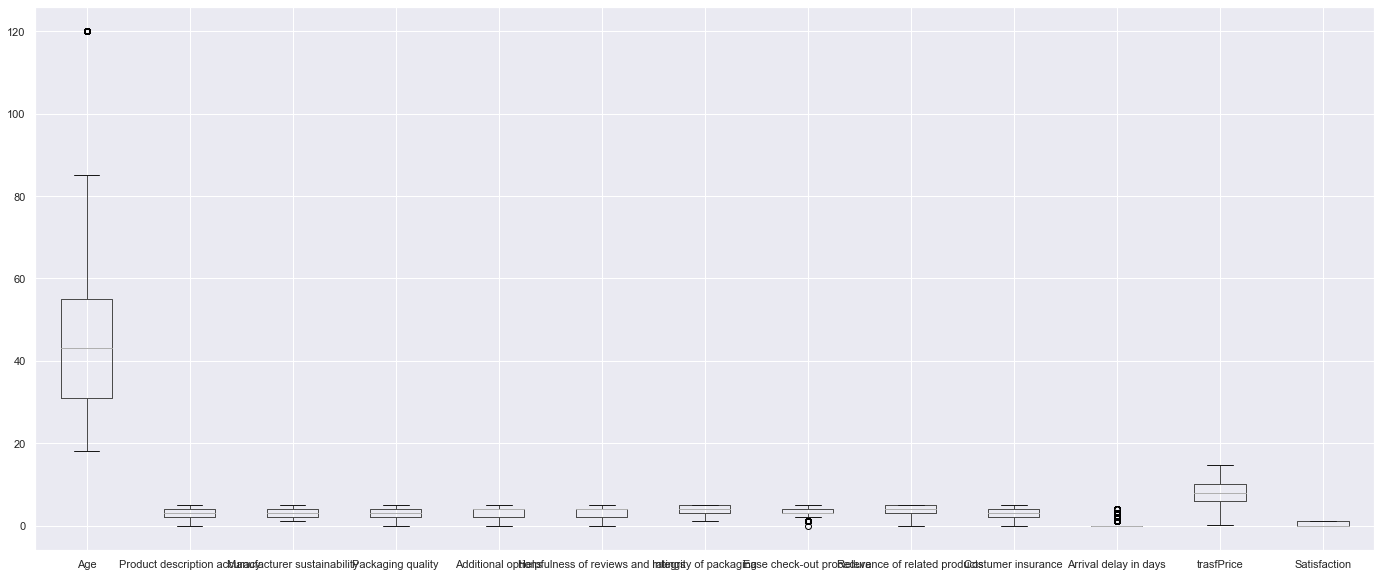

In [50]:
#In just 3 variables (Age, Arrival delay in days and Easy check out procedure) there are some points out of the whiskers
#The first 2 columns have been already analyzed and it was decided to do not delete the observation.
#An analysis of the Easy check out procedure variable should be conducted

sns.set(rc={'figure.figsize':(24,10)})
df_num3.boxplot()


In [51]:
#Just one customer evaluated the easiness of the check out procedure equal to 0. It was decided to delete this observation

df_easycheck=df_num3[['Ease check-out procedure','Satisfaction']]
vector_easycheck=df_num3['Ease check-out procedure'].unique()
for i in vector_easycheck:
    df_new=df_easycheck.loc[df_easycheck['Ease check-out procedure']==i]
    print('Easy check procedure=',i)
    print("The number of obs is:",df_new['Satisfaction'].count())
    print(df_new['Satisfaction'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')


Easy check procedure= 3
The number of obs is: 13635
0    58.0%
1    42.0%
Name: Satisfaction, dtype: object
Easy check procedure= 4
The number of obs is: 13979
0    56.2%
1    43.8%
Name: Satisfaction, dtype: object
Easy check procedure= 1
The number of obs is: 6233
0    78.5%
1    21.5%
Name: Satisfaction, dtype: object
Easy check procedure= 5
The number of obs is: 9880
1    59.2%
0    40.8%
Name: Satisfaction, dtype: object
Easy check procedure= 2
The number of obs is: 6249
0    76.7%
1    23.3%
Name: Satisfaction, dtype: object
Easy check procedure= 0
The number of obs is: 1
0    100.0%
Name: Satisfaction, dtype: object


In [52]:
df_num3[df_num3['Ease check-out procedure']==0]


,Age,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Arrival delay in days,trasfPrice,Satisfaction
49004,44.0,5,5,1,4,3,3,0,1,0,2,4.869471,0


In [53]:
#Elination of the observation associated to 'Easy check out procedure'=0

df_num3=df_num3.drop(49004)
df_num3


,Age,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Arrival delay in days,trasfPrice,Satisfaction
0,60.0,4,4,2,4,3,5,3,4,2,0,5.782223,0
1,57.0,1,1,3,5,5,5,4,5,5,0,12.595530,1
2,38.0,3,3,5,5,5,4,1,5,5,0,12.337017,1
3,120.0,5,5,3,2,5,4,5,1,3,0,7.930980,0
4,37.0,1,1,5,1,3,3,2,2,5,0,4.686653,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,29.0,1,1,3,3,4,3,1,3,3,0,9.829906,0
49973,28.0,3,3,5,1,4,4,2,4,5,0,4.384619,0
49974,28.0,5,1,4,1,1,5,4,4,4,0,7.392435,0
49975,35.0,4,4,1,2,2,2,3,2,3,0,8.370897,0


In [54]:
df_num3 = df_num3.reset_index()
df_num3

,index,Age,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Arrival delay in days,trasfPrice,Satisfaction
0,0,60.0,4,4,2,4,3,5,3,4,2,0,5.782223,0
1,1,57.0,1,1,3,5,5,5,4,5,5,0,12.595530,1
2,2,38.0,3,3,5,5,5,4,1,5,5,0,12.337017,1
3,3,120.0,5,5,3,2,5,4,5,1,3,0,7.930980,0
4,4,37.0,1,1,5,1,3,3,2,2,5,0,4.686653,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49971,49972,29.0,1,1,3,3,4,3,1,3,3,0,9.829906,0
49972,49973,28.0,3,3,5,1,4,4,2,4,5,0,4.384619,0
49973,49974,28.0,5,1,4,1,1,5,4,4,4,0,7.392435,0
49974,49975,35.0,4,4,1,2,2,2,3,2,3,0,8.370897,0


In [55]:
df_num3=df_num3.drop(columns='index')
df_num3

,Age,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Arrival delay in days,trasfPrice,Satisfaction
0,60.0,4,4,2,4,3,5,3,4,2,0,5.782223,0
1,57.0,1,1,3,5,5,5,4,5,5,0,12.595530,1
2,38.0,3,3,5,5,5,4,1,5,5,0,12.337017,1
3,120.0,5,5,3,2,5,4,5,1,3,0,7.930980,0
4,37.0,1,1,5,1,3,3,2,2,5,0,4.686653,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49971,29.0,1,1,3,3,4,3,1,3,3,0,9.829906,0
49972,28.0,3,3,5,1,4,4,2,4,5,0,4.384619,0
49973,28.0,5,1,4,1,1,5,4,4,4,0,7.392435,0
49974,35.0,4,4,1,2,2,2,3,2,3,0,8.370897,0


In [56]:
#It is needed to delete the associated observation to 'Easy check out procedure'=0 also in the dummies dataset, otherwise
#there would not be a match with the numerical dataset

dummies2=dummies2.drop(49004)
dummies2


,index,Gender_Male,Customer Type_Premium
0,0,0,1
1,1,0,1
2,2,0,1
3,3,1,1
4,4,1,1
...,...,...,...
49972,49993,0,1
49973,49994,0,1
49974,49995,1,1
49975,49996,1,1


In [57]:
dummies2 = dummies2.reset_index()
dummies2

,level_0,index,Gender_Male,Customer Type_Premium
0,0,0,0,1
1,1,1,0,1
2,2,2,0,1
3,3,3,1,1
4,4,4,1,1
...,...,...,...,...
49971,49972,49993,0,1
49972,49973,49994,0,1
49973,49974,49995,1,1
49974,49975,49996,1,1


In [58]:
dummies2=dummies2.drop(columns=['index','level_0'])
dummies2

,Gender_Male,Customer Type_Premium
0,0,1
1,0,1
2,0,1
3,1,1
4,1,1
...,...,...
49971,0,1
49972,0,1
49973,1,1
49974,1,1


In [59]:
#Scale the numerical variables because the scale can interfere with some algorithms

from sklearn.preprocessing import StandardScaler
independent_variables=df_num3.iloc[:,:-1]  #Satisfaction column is not scaled

scaler = StandardScaler().fit(independent_variables) 
scalednum_df = pd.DataFrame(scaler.transform(independent_variables)) #data frame with 
scalednum_df.columns = independent_variables.columns
#I create the scaled data frame

scalednum_df.head()


,Age,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Arrival delay in days,trasfPrice
0,0.500121,0.614815,0.800224,-0.893112,0.491330,-0.254704,1.167096,-0.237365,0.312645,-0.966167,-0.282669,-0.818074
1,0.378433,-1.349679,-1.548609,-0.142933,1.266905,1.264461,1.167096,0.552209,1.163526,1.314088,-0.282669,1.651653
2,-0.392260,-0.040016,0.017280,1.357426,1.266905,1.264461,0.320602,-1.816512,1.163526,1.314088,-0.282669,1.557945
3,2.933889,1.269647,1.583169,-0.142933,-1.059821,1.264461,0.320602,1.341782,-2.239998,-0.206082,-0.282669,-0.039180
4,-0.432823,-1.349679,-1.548609,1.357426,-1.835396,-0.254704,-0.525891,-1.026939,-1.389117,1.314088,-0.282669,-1.215202


In [60]:
scalednum_df

,Age,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Arrival delay in days,trasfPrice
0,0.500121,0.614815,0.800224,-0.893112,0.491330,-0.254704,1.167096,-0.237365,0.312645,-0.966167,-0.282669,-0.818074
1,0.378433,-1.349679,-1.548609,-0.142933,1.266905,1.264461,1.167096,0.552209,1.163526,1.314088,-0.282669,1.651653
2,-0.392260,-0.040016,0.017280,1.357426,1.266905,1.264461,0.320602,-1.816512,1.163526,1.314088,-0.282669,1.557945
3,2.933889,1.269647,1.583169,-0.142933,-1.059821,1.264461,0.320602,1.341782,-2.239998,-0.206082,-0.282669,-0.039180
4,-0.432823,-1.349679,-1.548609,1.357426,-1.835396,-0.254704,-0.525891,-1.026939,-1.389117,1.314088,-0.282669,-1.215202
...,...,...,...,...,...,...,...,...,...,...,...,...
49971,-0.757325,-1.349679,-1.548609,-0.142933,-0.284245,0.504879,-0.525891,-1.816512,-0.538236,-0.206082,-0.282669,0.649153
49972,-0.797888,-0.040016,0.017280,1.357426,-1.835396,0.504879,0.320602,-1.026939,0.312645,1.314088,-0.282669,-1.324685
49973,-0.797888,1.269647,-1.548609,0.607247,-1.835396,-1.773869,1.167096,0.552209,0.312645,0.554003,-0.282669,-0.234395
49974,-0.513948,0.614815,0.800224,-1.643291,-1.059821,-1.014286,-1.372385,-0.237365,-1.389117,-0.206082,-0.282669,0.120284


In [62]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(df_num3, open('df_num3.pkl', 'wb'))
pickle.dump(dummies2, open('dummies2.pkl', 'wb'))
pickle.dump(scalednum_df, open('scalednum.pkl', 'wb'))

<AxesSubplot:>

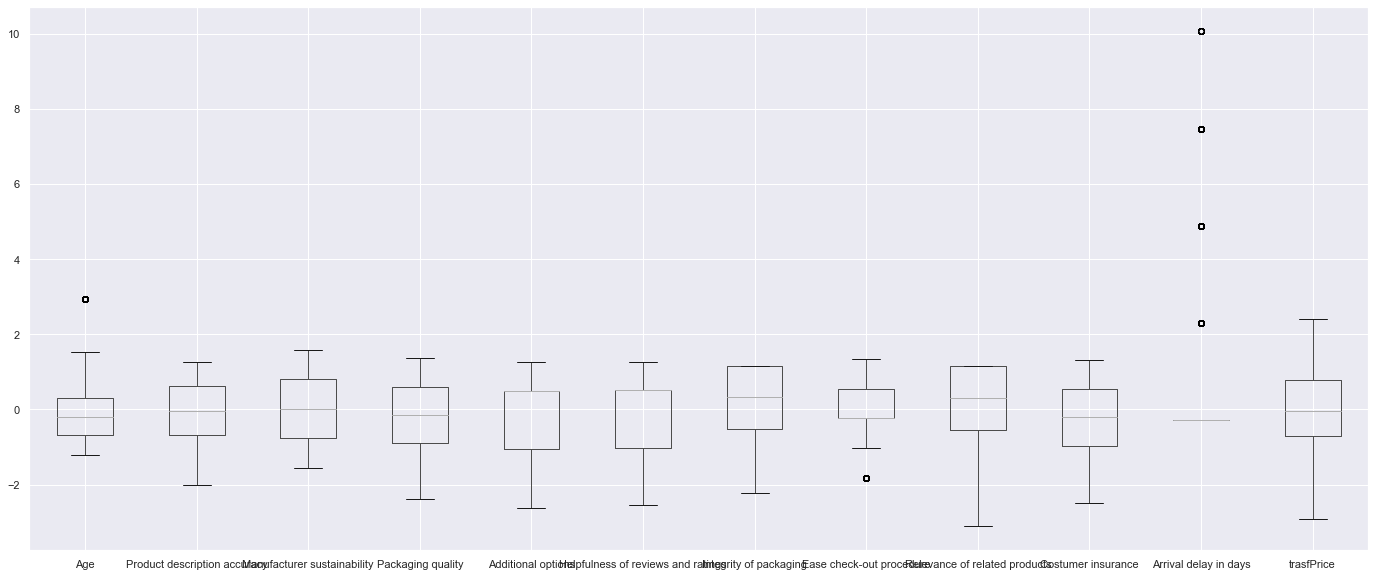

In [63]:
scalednum_df.boxplot()

#In just 3 columns there are some points out of the whiskers but from the previous analysis it emerged that they are relevant
#for the discrimination between satisfacted and non satisfacted customers

In [64]:
X_numerical=scalednum_df

In [65]:
print(dummies2.shape)
print(X_numerical.shape)

(49976, 2)
(49976, 12)


In [66]:
dummies2

,Gender_Male,Customer Type_Premium
0,0,1
1,0,1
2,0,1
3,1,1
4,1,1
...,...,...
49971,0,1
49972,0,1
49973,1,1
49974,1,1


In [67]:
X_numerical

,Age,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Arrival delay in days,trasfPrice
0,0.500121,0.614815,0.800224,-0.893112,0.491330,-0.254704,1.167096,-0.237365,0.312645,-0.966167,-0.282669,-0.818074
1,0.378433,-1.349679,-1.548609,-0.142933,1.266905,1.264461,1.167096,0.552209,1.163526,1.314088,-0.282669,1.651653
2,-0.392260,-0.040016,0.017280,1.357426,1.266905,1.264461,0.320602,-1.816512,1.163526,1.314088,-0.282669,1.557945
3,2.933889,1.269647,1.583169,-0.142933,-1.059821,1.264461,0.320602,1.341782,-2.239998,-0.206082,-0.282669,-0.039180
4,-0.432823,-1.349679,-1.548609,1.357426,-1.835396,-0.254704,-0.525891,-1.026939,-1.389117,1.314088,-0.282669,-1.215202
...,...,...,...,...,...,...,...,...,...,...,...,...
49971,-0.757325,-1.349679,-1.548609,-0.142933,-0.284245,0.504879,-0.525891,-1.816512,-0.538236,-0.206082,-0.282669,0.649153
49972,-0.797888,-0.040016,0.017280,1.357426,-1.835396,0.504879,0.320602,-1.026939,0.312645,1.314088,-0.282669,-1.324685
49973,-0.797888,1.269647,-1.548609,0.607247,-1.835396,-1.773869,1.167096,0.552209,0.312645,0.554003,-0.282669,-0.234395
49974,-0.513948,0.614815,0.800224,-1.643291,-1.059821,-1.014286,-1.372385,-0.237365,-1.389117,-0.206082,-0.282669,0.120284


In [68]:
X=pd.concat([dummies2,X_numerical], axis = 1)
#X=X.drop(columns='index')
X.sample(10)

,Gender_Male,Customer Type_Premium,Age,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Arrival delay in days,trasfPrice
22687,0,1,-1.122390,1.269647,-1.548609,-0.142933,-1.835396,1.264461,-0.525891,-0.237365,0.312645,-0.206082,-0.282669,-0.059203
26817,0,1,-0.635637,1.269647,1.583169,-0.142933,-0.284245,0.504879,1.167096,-0.237365,0.312645,-0.206082,-0.282669,-1.923735
4211,1,1,2.933889,0.614815,0.017280,-0.142933,0.491330,1.264461,1.167096,1.341782,1.163526,-0.206082,-0.282669,-0.268646
18383,1,1,-0.067758,-1.349679,-1.548609,-1.643291,-1.835396,-1.773869,-2.218878,-1.026939,-2.239998,-0.966167,-0.282669,1.488742
12285,0,1,-0.635637,1.269647,0.017280,1.357426,-0.284245,1.264461,1.167096,-0.237365,1.163526,1.314088,-0.282669,-0.855179
37645,0,1,-0.027195,-1.349679,-1.548609,1.357426,-0.284245,-0.254704,-0.525891,-0.237365,-0.538236,-0.966167,-0.282669,1.674378
8043,1,1,-0.473386,0.614815,0.017280,-0.142933,1.266905,-1.773869,0.320602,-1.026939,1.163526,-0.206082,-0.282669,-1.375334
22213,0,0,-1.203516,1.269647,0.017280,1.357426,1.266905,-1.014286,1.167096,0.552209,1.163526,1.314088,-0.282669,0.615049
20438,0,1,0.256745,0.614815,0.800224,-0.893112,0.491330,0.504879,0.320602,1.341782,0.312645,1.314088,-0.282669,0.670085
20744,1,0,-0.716762,-0.040016,0.800224,1.357426,-1.835396,-1.014286,-0.525891,0.552209,0.312645,1.314088,-0.282669,-0.087172


In [69]:
Y=df_num3.iloc[:,-1]
Y

0        0
1        1
2        1
3        0
4        1
        ..
49971    0
49972    0
49973    0
49974    0
49975    1
Name: Satisfaction, Length: 49976, dtype: int64

In [70]:
import pickle
pickle.dump(X, open('X.pkl', 'wb'))
pickle.dump(Y, open('Y.pkl', 'wb'))

In [71]:
#load target and dataset
import pickle
X = pickle.load(open('X.pkl', 'rb'))
Y = pickle.load(open('Y.pkl', 'rb'))

In [72]:
#split the data in train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size =0.25, 
                                                    
                                                    stratify=Y,
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape)
print(X_test.shape)

(37482, 14)
(12494, 14)


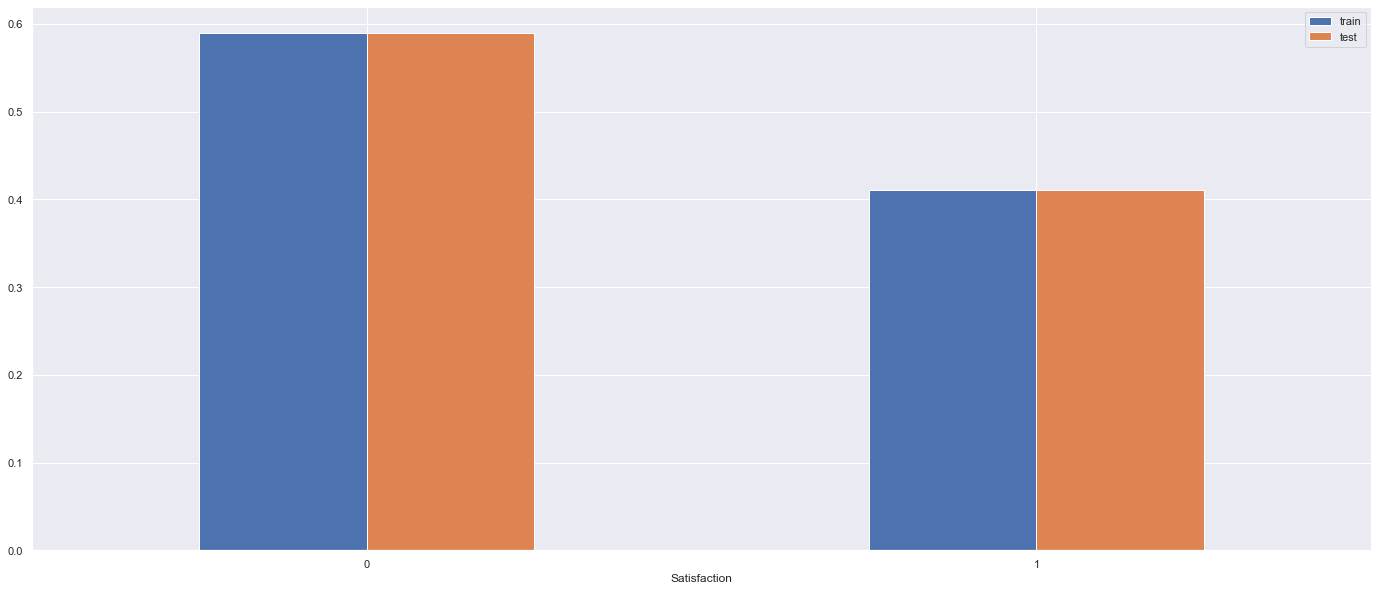

In [73]:
y_train_dist=y_train.groupby(y_train.iloc[:]).size()/y_train.size
y_test_dist=y_test.groupby(y_test.iloc[:]).size()/y_test.size

train_test_dist = pd.DataFrame({'train': y_train_dist, 'test': y_test_dist})
ax = train_test_dist.plot.bar(rot=0) 

## Naive Bayes classifier

In [74]:
#From a conceptual point of view it is wrong to apply this calssifier becasue the hypothesis of independence among
#the explanatory variables is irrealistic in this case

from sklearn.naive_bayes import GaussianNB 

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

In [75]:
#EVALUATE YOUR PREDICTION 
from sklearn.metrics import f1_score
print('***RESULTS ON TRAINING SET***')
print("f1_score: ", f1_score(y_train, y_pred_train))
print('***RESULTS ON TEST SET***')
print("f1_score: ", f1_score(y_test, y_pred))

***RESULTS ON TRAINING SET***
f1_score:  0.696204945648719
***RESULTS ON TEST SET***
f1_score:  0.698230511716882


In [76]:
#Save the model and y_pred and y_pred_train

model_NB = model
pickle.dump(model_NB, open('model_NB.pkl', 'wb'))
pickle.dump(y_pred_train, open('G_NBy_pred_train.pkl', 'wb'))
pickle.dump(y_pred, open('G_NBy_pred.pkl', 'wb'))

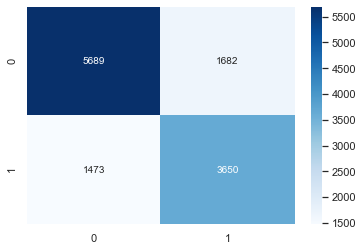

In [77]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues");


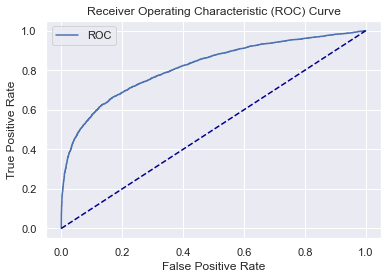

AUC: 0.82


In [78]:
#ROC curve

from sklearn import metrics

y_probs = model.predict_proba(X_test) 

fpr_bayes, tpr_bayes, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr_bayes, tpr_bayes, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)


In [79]:
#Save false and positive rate to build all the ROC curves associated to the different algorithms later

pickle.dump(fpr_bayes, open('fpr_bayes.pkl', 'wb'))
pickle.dump(tpr_bayes, open('tpr_bayes.pkl', 'wb'))

## Classification tree

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [7,10,12,15,18],
              'min_samples_split': [15,20,30,35,50],
              'min_samples_leaf': [10,15,20,25,30,60]}

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=5, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))


    #A grid search function is created because it will be used a lot of times
    
    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("f1      train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) )) 
    print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) ))
    print("accuracy  train %.3f   test %.3f" % (accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred) ))
    print("recall  train %.3f   test %.3f" % (recall_score(y_train, y_pred_train), recall_score(y_test, y_pred) ))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues");
    


f1_train: 0.781252 using {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 10, 'min_samples_split': 50}
f1      train 0.831   test 0.796
precision  train 0.877   test 0.836
accuracy  train 0.868   test 0.840
recall  train 0.790   test 0.759


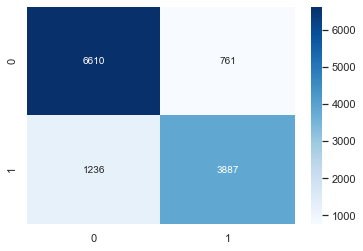

In [163]:
hyperp_search(classifier,parameters)

f1      train 0.831   test 0.798
precision  train 0.868   test 0.832
accuracy  train 0.867   test 0.841
recall  train 0.797   test 0.765


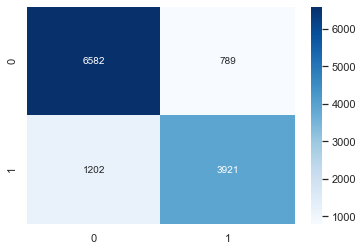

In [164]:
#I try to reduce the overfitting effect changing the parameters of the tree

treemodel = DecisionTreeClassifier(criterion='entropy',max_depth=13,min_samples_leaf=12,min_samples_split=35)
treemodel.fit(X_train, y_train)
y_pred = treemodel.predict(X_test)
y_pred_train = treemodel.predict(X_train)
print("f1      train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) ))
print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) ))
print("accuracy  train %.3f   test %.3f" % (accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred) ))
print("recall  train %.3f   test %.3f" % (recall_score(y_train, y_pred_train), recall_score(y_test, y_pred) ))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues");


In [165]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=13, min_samples_leaf=12, min_samples_split=35)
pickle.dump(model_tree, open('model_tree.pkl', 'wb'))
pickle.dump(y_pred_train, open('G_treey_pred_train.pkl', 'wb'))
pickle.dump(y_pred, open('G_treey_pred.pkl', 'wb'))


In [11]:
#I define the roc curve function because it will be used a lot of times

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

fpr_tree,tpr_tree=roc(model_tree,X_train,y_train,X_test,y_test)


In [167]:
pickle.dump(fpr_tree, open('fpr_tree.pkl', 'wb'))
pickle.dump(tpr_tree, open('tpr_tree.pkl', 'wb'))

## Logistic regression

f1_train: 0.713184 using {'C': 5, 'max_iter': 1000}
f1      train 0.713   test 0.710
precision  train 0.749   test 0.750
accuracy  train 0.776   test 0.774
recall  train 0.680   test 0.674


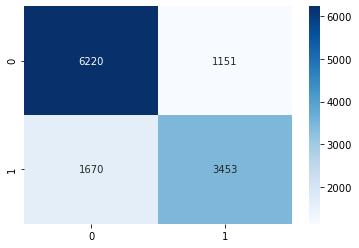

In [57]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
parameters = {"C":[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,6,7,10], "max_iter":[1000]}


hyperp_search(classifier,parameters)

In [58]:
model_logistic=LogisticRegression(C=5, max_iter=1000)
pickle.dump(model_logistic, open('model_logistic.pkl', 'wb'))
pickle.dump(y_pred_train, open('G_logisticy_pred_train.pkl', 'wb'))
pickle.dump(y_pred, open('G_logisticy_pred.pkl', 'wb'))



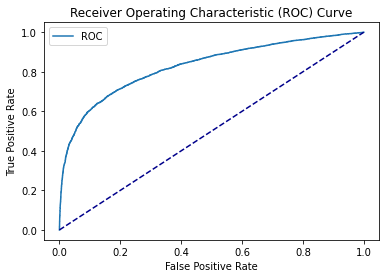

AUC: 0.83


In [59]:
fpr_logistic,tpr_logistic=roc(model_logistic,X_train,y_train,X_test,y_test)

In [60]:
pickle.dump(fpr_logistic, open('fpr_logistic.pkl', 'wb'))
pickle.dump(tpr_logistic, open('tpr_logistic.pkl', 'wb'))

In [61]:
model_logistic.fit(X_train,y_train)

coeff=pd.DataFrame()
coeff["feature"]=X_train.columns
coeff["w"]=model_logistic.coef_[0]

coeff.sort_values(by=['w'], inplace=True)

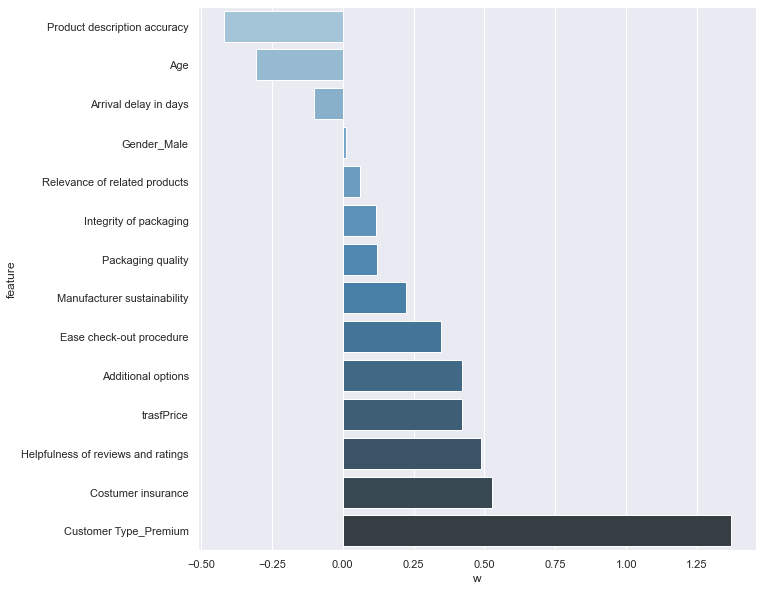

In [62]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=coeff, y="feature", x="w", palette="Blues_d", orient="h")
sns.set(rc={'figure.figsize':(6,4)})

#The image below offers a great understanding on how much the explanatory variables influence positively or negatively the 
#Satisfaction variable.
#In fact it is possible to clearly see the magnitude of the coefficients to build the logistic regression curve, they tell me how much
#the explanatory variables are correlated with the target variable (the higher the age and the lower the satisfaction for example)
#Some analysis and graphs made before are confirmed by the image below

## Random Forest

f1_train: 0.804631 using {'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 8, 'min_samples_split': 15, 'n_estimators': 50}
f1      train 0.859   test 0.817
precision  train 0.928   test 0.895
accuracy  train 0.892   test 0.862
recall  train 0.799   test 0.751


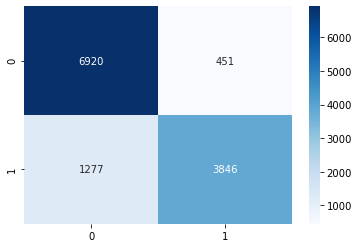

In [19]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
parameters = {'n_estimators' : [50,80],
              'criterion': ['entropy','gini'], 
              'max_depth': [7,15,35],
              'min_samples_split': [15,35],
              'min_samples_leaf': [8,20]}

hyperp_search(classifier,parameters)

In [25]:
randomforestmodel = RandomForestClassifier(n_estimators=43,criterion='entropy',max_depth=30,min_samples_leaf=13,min_samples_split=12)
randomforestmodel.fit(X_train, y_train)
y_pred =randomforestmodel.predict(X_test)
y_pred_train = randomforestmodel.predict(X_train)
print("f1      train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) ))
print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) ))
print("accuracy  train %.3f   test %.3f" % (accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred) ))
print("recall  train %.3f   test %.3f" % (recall_score(y_train, y_pred_train), recall_score(y_test, y_pred) ))

f1      train 0.838   test 0.810
precision  train 0.913   test 0.893
accuracy  train 0.877   test 0.857
recall  train 0.774   test 0.741


In [35]:
model_randomforest=RandomForestClassifier(n_estimators=43,criterion='entropy',max_depth=30,min_samples_leaf=13,min_samples_split=12)
pickle.dump(model_randomforest, open('model_randomforest.pkl', 'wb'))
pickle.dump(y_pred_train, open('G_randomforesty_pred_train.pkl', 'wb'))
pickle.dump(y_pred, open('G_randomforesty_pred.pkl', 'wb'))

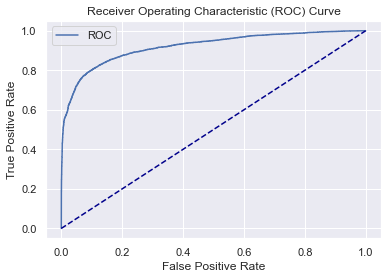

AUC: 0.92


In [63]:
fpr_rf,tpr_rf=roc(model_randomforest,X_train,y_train,X_test,y_test)

In [64]:
pickle.dump(fpr_rf, open('fpr_rf.pkl', 'wb'))
pickle.dump(tpr_rf, open('tpr_rf.pkl', 'wb'))

<AxesSubplot:>

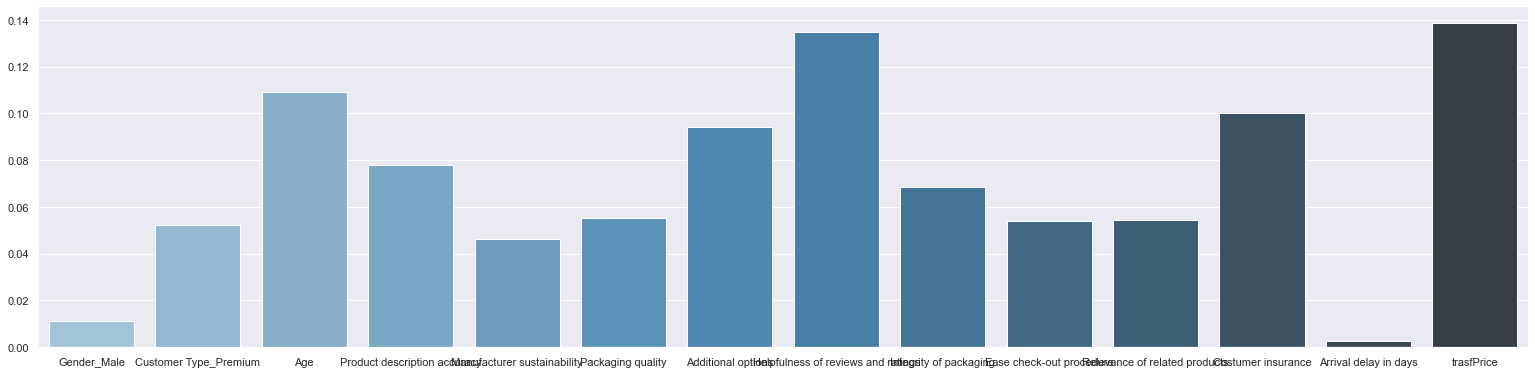

In [76]:
#As it is possible to see from the plot the Arrival delay in days slightly influnece the Satisfaction of the customers, confirming
#the analysis made in the prevous stages
sns.set(rc={'figure.figsize':(26.7,6.27)})
sns.barplot(x=X_train.columns, y=model_randomforest.feature_importances_, palette="Blues_d")

## KNN classifier

f1_train: 0.781940 using {'n_neighbors': 11}
f1      train 0.820   test 0.794
precision  train 0.868   test 0.845
accuracy  train 0.860   test 0.840
recall  train 0.777   test 0.748


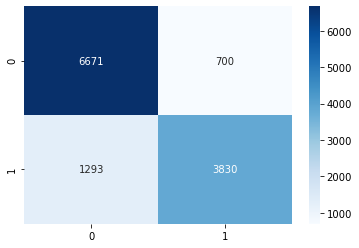

In [39]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier() 
parameters = {'n_neighbors':np.arange(1,50)}

hyperp_search(classifier,parameters)

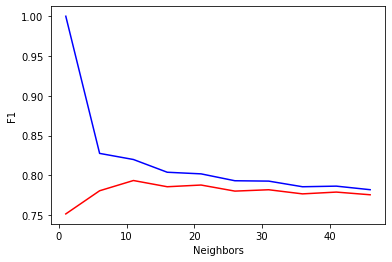

In [40]:
#SPIEGAZIONE
score_train=[]
score_test=[]

neighbors=range(1,50,5) 

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    score_train.append( metrics.f1_score(y_train, y_pred_train)) 
    score_test.append( metrics.f1_score(y_test, y_pred_test)) 
#I wanto to see what happens when I increase the number of neighbours
#IF k=1 i have the most complex model, I replicate the training data set, I will not have errors in the training set
plt.xlabel('Neighbors')
plt.ylabel('F1')
plt.plot (neighbors,score_train, color='blue', alpha=1.00)
plt.plot (neighbors,score_test, color='red', alpha=1.00)

plt.show()

In [43]:
KNNmodel = KNeighborsClassifier(n_neighbors=21)
KNNmodel.fit(X_train, y_train)
y_pred =KNNmodel.predict(X_test)
y_pred_train = KNNmodel.predict(X_train)
print("f1      train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) ))
print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) ))
print("accuracy  train %.3f   test %.3f" % (accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred) ))
print("recall  train %.3f   test %.3f" % (recall_score(y_train, y_pred_train), recall_score(y_test, y_pred) ))

f1      train 0.802   test 0.788
precision  train 0.858   test 0.846
accuracy  train 0.848   test 0.837
recall  train 0.752   test 0.737


In [44]:
model_KNN=KNeighborsClassifier(n_neighbors=21)
pickle.dump(model_KNN, open('model_KNN.pkl', 'wb'))
pickle.dump(y_pred_train, open('G_KNNy_pred_train.pkl', 'wb'))
pickle.dump(y_pred, open('G_KNNy_pred.pkl', 'wb'))


In [78]:
model_KNN = pickle.load(open('model_KNN.pkl', 'rb'))

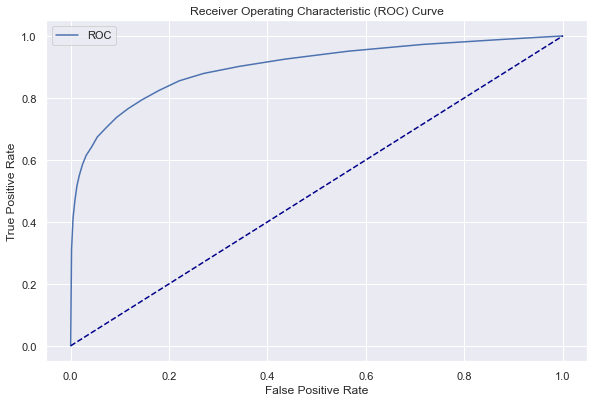

AUC: 0.90


In [83]:
sns.set(rc={'figure.figsize':(9.7,6.27)})
fpr_KNN,tpr_KNN=roc(model_KNN,X_train,y_train,X_test,y_test)

In [80]:
pickle.dump(fpr_KNN, open('fpr_KNN.pkl', 'wb'))
pickle.dump(tpr_KNN, open('tpr_KNN.pkl', 'wb'))

## ML Perceptron classifier

f1_train: 0.821097 using {'activation': 'relu', 'alpha': 0.002, 'hidden_layer_sizes': (20, 10, 5), 'max_iter': 4000}
f1      train 0.839   test 0.826
precision  train 0.898   test 0.886
accuracy  train 0.876   test 0.867
recall  train 0.787   test 0.774


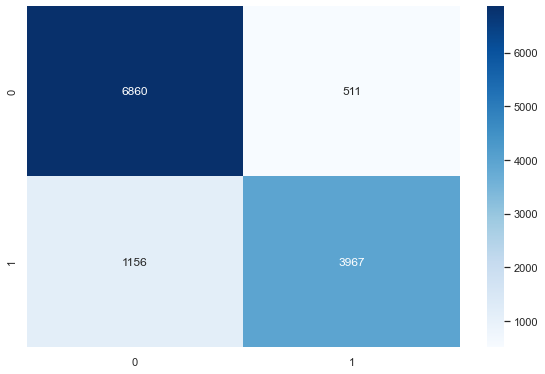

In [104]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(25,10,8),(20,10,5)],  "max_iter": [3800,4000], "alpha": [0.0007,0.001, 0.002],'activation':['logistic','relu']}
hyperp_search(classifier,parameters)

In [191]:
MLPmodel=MLPClassifier(alpha=0.0018, hidden_layer_sizes= (20,10,8), max_iter= 4200, activation='relu')
MLPmodel.fit(X_train, y_train)
y_pred =MLPmodel.predict(X_test)
y_pred_train = MLPmodel.predict(X_train)
print("f1      train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) ))
print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) ))
print("accuracy  train %.3f   test %.3f" % (accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred) ))
print("recall  train %.3f   test %.3f" % (recall_score(y_train, y_pred_train), recall_score(y_test, y_pred) ))

f1      train 0.837   test 0.830
precision  train 0.886   test 0.882
accuracy  train 0.873   test 0.868
recall  train 0.793   test 0.784


In [192]:
model_MLP=MLPClassifier(alpha=0.0018, hidden_layer_sizes= (20,10,8), max_iter= 4220, activation='relu')
pickle.dump(model_MLP, open('model_MLP.pkl', 'wb'))
pickle.dump(y_pred_train, open('G_MLPy_pred_train.pkl', 'wb'))
pickle.dump(y_pred, open('G_MLPy_pred.pkl', 'wb'))

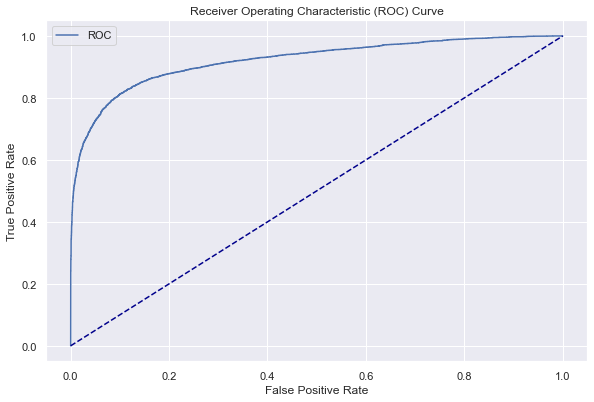

AUC: 0.92


In [193]:
fpr_MLP,tpr_MLP=roc(model_MLP,X_train,y_train,X_test,y_test)

In [195]:
pickle.dump(fpr_MLP, open('fpr_MLP.pkl', 'wb'))
pickle.dump(tpr_MLP, open('tpr_MLP.pkl', 'wb'))

## Adaboost 

f1_train: 0.824716 using {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=12), 'learning_rate': 0.1, 'n_estimators': 300}
f1      train 0.949   test 0.832
precision  train 0.969   test 0.874
accuracy  train 0.959   test 0.868
recall  train 0.929   test 0.794


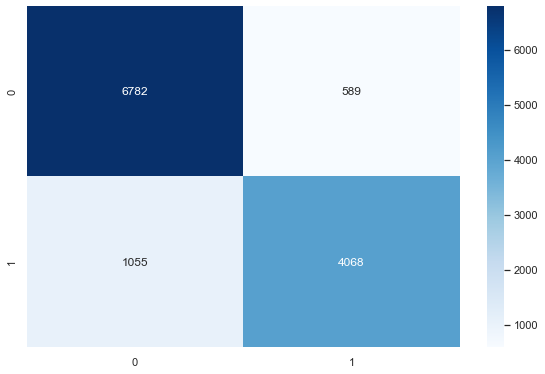

In [166]:
from sklearn.ensemble import AdaBoostClassifier

classifier= AdaBoostClassifier()
parameters = {'n_estimators' : [150,300],
     'base_estimator': [DecisionTreeClassifier(max_depth=(12)),LogisticRegression()], 'algorithm' :['SAMME'],
              'learning_rate' : [0.05,0.1,1]}

hyperp_search(classifier,parameters)

In [187]:
ADAmodel=AdaBoostClassifier(algorithm = 'SAMME', base_estimator=DecisionTreeClassifier(max_depth=8),learning_rate=0.15, n_estimators=80)
ADAmodel.fit(X_train, y_train)
y_pred =ADAmodel.predict(X_test)
y_pred_train = ADAmodel.predict(X_train)
print("f1      train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) ))
print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) ))
print("accuracy  train %.3f   test %.3f" % (accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred) ))
print("recall  train %.3f   test %.3f" % (recall_score(y_train, y_pred_train), recall_score(y_test, y_pred) ))


f1      train 0.863   test 0.833
precision  train 0.905   test 0.878
accuracy  train 0.893   test 0.870
recall  train 0.825   test 0.793


In [196]:
model_ADA=AdaBoostClassifier(algorithm = 'SAMME', base_estimator=DecisionTreeClassifier(max_depth=8),learning_rate=0.15, n_estimators=80)
pickle.dump(model_ADA, open('model_ADA.pkl', 'wb'))
pickle.dump(y_pred_train, open('G_ADAy_pred_train.pkl', 'wb'))
pickle.dump(y_pred, open('G_ADAy_pred.pkl', 'wb'))

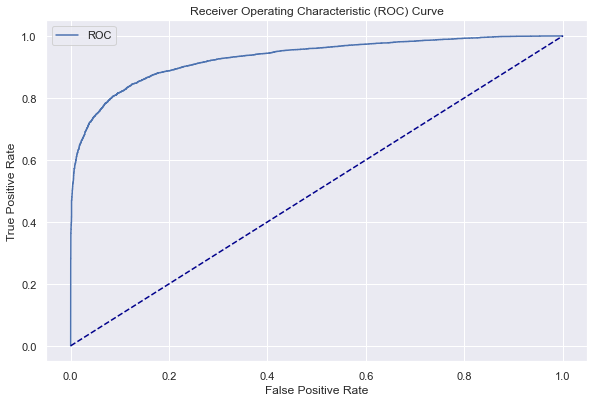

AUC: 0.93


In [197]:
fpr_ADA,tpr_ADA=roc(model_ADA,X_train,y_train,X_test,y_test)

In [198]:
pickle.dump(fpr_ADA, open('fpr_MLP.pkl', 'wb'))
pickle.dump(tpr_ADA, open('tpr_MLP.pkl', 'wb'))

## SVM

f1_train: 0.714359 using {'C': 15, 'gamma': 1, 'kernel': 'linear'}
f1      train 0.715   test 0.713
precision  train 0.763   test 0.765
accuracy  train 0.780   test 0.779
recall  train 0.673   test 0.667


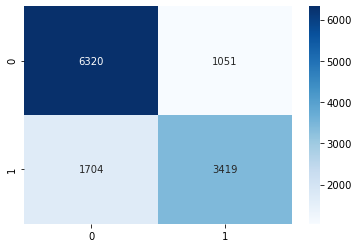

In [57]:
from sklearn.svm import SVC
classifier = SVC()
parameters = {"kernel":['linear',], "C":[1,5,15],"gamma":[1,5]}
hyperp_search(classifier,parameters)


In [171]:
SVMmodel=SVC(kernel='linear',gamma=0.0001,C=5,probability=True)
SVMmodel.fit(X_train, y_train)
y_pred =SVMmodel.predict(X_test)
y_pred_train = SVMmodel.predict(X_train)
print("f1      train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) ))
print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) ))
print("accuracy  train %.3f   test %.3f" % (accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred) ))
print("recall  train %.3f   test %.3f" % (recall_score(y_train, y_pred_train), recall_score(y_test, y_pred) ))


f1      train 0.715   test 0.713
precision  train 0.763   test 0.765
accuracy  train 0.780   test 0.779
recall  train 0.673   test 0.667


In [172]:
model_SVM=SVC(kernel='linear',gamma=0.0001,C=5,probability=True)
pickle.dump(model_SVM, open('model_SVM.pkl', 'wb'))
pickle.dump(y_pred_train, open('G_SVMy_pred_train.pkl', 'wb'))
pickle.dump(y_pred, open('G_SVMy_pred.pkl', 'wb'))

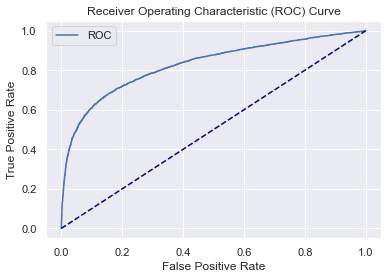

AUC: 0.83


In [173]:
fpr_SVM,tpr_SVM=roc(model_SVM,X_train,y_train,X_test,y_test)

In [176]:
pickle.dump(fpr_SVM, open('fpr_SVM.pkl', 'wb'))
pickle.dump(tpr_SVM, open('tpr_SVM.pkl', 'wb'))

## Bagging

In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier

bagging = BaggingClassifier(MLPClassifier(),n_estimators=100,
                            max_samples=0.5, max_features=0.8)

In [17]:
bagging.fit(X_train, y_train)

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

BaggingClassifier(base_estimator=MLPClassifier(), max_features=0.8,
                  max_samples=0.5, n_estimators=100)

In [18]:
y_pred = bagging.predict(X_test)
y_pred_train = bagging.predict(X_train)

In [19]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn.metrics import f1_score


print('***RESULTS ON TRAIN SET***')
print("f1_score: ", f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.8352294605663877
--
***RESULTS ON TEST SET***
f1_score:  0.8218166473256673


In [20]:
model_bagging=bagging
pickle.dump(model_bagging, open('model_bagging.pkl', 'wb'))
pickle.dump(y_pred_train, open('G_baggingy_pred_train.pkl', 'wb'))
pickle.dump(y_pred, open('G_baggingy_pred.pkl', 'wb'))

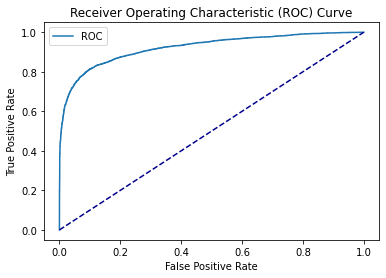

AUC: 0.92


In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

model_bagging = pickle.load(open('model_bagging.pkl', 'rb'))
y_probs = model_bagging.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr_bagging, tpr_bagging, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr_bagging, tpr_bagging, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

In [23]:
pickle.dump(fpr_bagging, open('fpr_bagging.pkl', 'wb'))
pickle.dump(tpr_bagging, open('tpr_bagging.pkl', 'wb'))

## Voting classifer

In [11]:
from sklearn.ensemble import VotingClassifier

clf1 = KNeighborsClassifier(n_neighbors=21)
clf2 = RandomForestClassifier(n_estimators=43,criterion='entropy',max_depth=30,min_samples_leaf=13,min_samples_split=12)
clf3 = MLPClassifier(alpha=0.0018, hidden_layer_sizes= (20,10,8), max_iter= 4220, activation='relu')
clf4= AdaBoostClassifier(algorithm = 'SAMME', base_estimator=DecisionTreeClassifier(max_depth=8),learning_rate=0.15, n_estimators=80)
clf5= BaggingClassifier(base_estimator=MLPClassifier(), max_features=0.8, max_samples=0.5, n_estimators=100)

vc = VotingClassifier(estimators=[
        ('rf', clf2), ('MLP', clf3),('bag',clf5),('KNN', clf1),('ada', clf4)], voting='soft',)

In [12]:
vc = vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
y_pred_train = vc.predict(X_train)

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

In [13]:
from sklearn.metrics import f1_score


print('***RESULTS ON TRAIN SET***')
print("f1_score: ", f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.8462392450735499
--
***RESULTS ON TEST SET***
f1_score:  0.8327238533068645


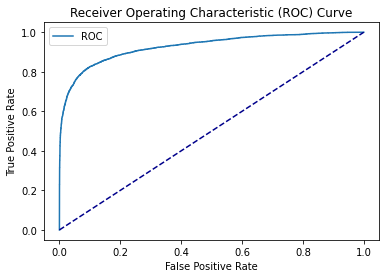

AUC: 0.93


In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

y_probs = vc.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr_vc, tpr_vc, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr_vc, tpr_vc, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

In [16]:
model_vc=vc
pickle.dump(model_vc, open('model_vc.pkl', 'wb'))
pickle.dump(y_pred_train, open('G_vcy_pred_train.pkl', 'wb'))
pickle.dump(y_pred, open('G_vcy_pred.pkl', 'wb'))
pickle.dump(fpr_vc, open('fpr_vc.pkl', 'wb'))
pickle.dump(tpr_vc, open('tpr_vc.pkl', 'wb'))

## Stacking

In [17]:
from sklearn.ensemble import StackingClassifier

stc = StackingClassifier(estimators=[('rf', clf2), ('MLP', clf3),('bag',clf5),('KNN', clf1),('ada', clf4)], final_estimator=LogisticRegression())

In [ ]:
stc = stc.fit(X_train, y_train)
y_pred = stc.predict(X_test)
y_pred_train = stc.predict(X_train)

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13-U005NL\anaconda3\lib\site-packages\sklearn\n

In [ ]:
from sklearn.metrics import f1_score


print('***RESULTS ON TRAIN SET***')
print("f1_score: ", f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", f1_score(y_test, y_pred))

In [ ]:
y_probs = stc.predict_proba(X_test) 

fpr_stc, tpr_stc, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr_stc, tpr_stc, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)